<a href="https://colab.research.google.com/github/shyam1494/AITDeepLearningAssignments/blob/main/LSTM%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author classification
The task is to train a 1D CNN or an LSTM that is able to  classify text from two authors. The final model should be able to tell about a text with a given length (e.g. 60 characters) who wrote it. 

Please write the codes according to the following parts:

## Python module imports
Import all Python modules that you would need during the Assignment.

In [184]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from urllib.request import urlretrieve
import numpy as np
import random
import sys
import re, cgi

## Data acquisition
Seek a possible dataset, you can use any source, e.g.
* http://www.gutenberg.org/
* https://www.kaggle.com/datasets
* https://paperswithcode.com/datasets
* if you would like to learn Hungarian, than e.g. https://mek.oszk.hu/

You can download the text by hand (e.g. by copy-pasting some parts into txt files) or with Python. 

In [13]:
text1 = open('/content/author1.txt','r').read();
text2 = open('/content/author2.txt','r').read()
print(f"length of author 1 {len(text1)} author 2 {len(text2)}")

length of author 1 32442 author 2 34072


In [158]:
text1_balanced = text1[0:32001]
text2_balanced = text2[0:32001]

## Data analysis
Count the number of characters from both authors and display them on a plot (e.g. Seaborn's countplot).

In [161]:
text2_balanced

'This day Daniel Sutton was brought to the bar of the Court upon\na _Habeas Corpus_, in order to be arraigned on an indictment for\npreserving the lives of the King’s subjects, found by the grand jury\nfor the county of Essex.\n\n_Counsel for the Cr._ Mr. President, there is an indictment for high\ncrimes, and misdemeanors, found against Mr. Daniel Sutton, which hath\nbeen removed into this Court by _certiorari_; the _certiorari_ and\nreturn thereof hath been filed, and the Prisoner is now brought into\nCourt in order to be arraigned.\n\n_President._ Read the indictment.\n\n_Cl. of the Cr._ Daniel Sutton, hold up your hand. You stand indicted\nby the name of Daniel Sutton, late of the town of Ingatestone, in\nthe county of Essex, for that you by inoculating, and causing to be\ninoculated, and by means of certain secret medicines and modes of\npractice, unknown to this College and to all other practitioners, not\nhaving the fear of the College in your heart, do presume to preserve\nthe 

Text(0.5, 1.0, 'author list')

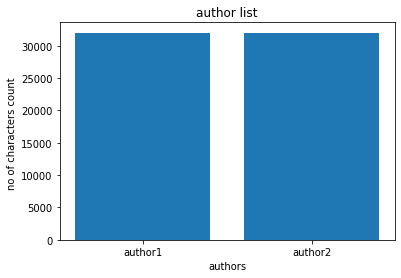

In [149]:
import matplotlib.pyplot as plt
plt.bar(['author1','author2'],[len(text1_balanced),len(text2_balanced)])
plt.xlabel("authors");
plt.ylabel("no of characters count ")
plt.title("author list")

## Data loading, labeling and preprocessing
Load the data and convert the characters into one-hot encodings. Then load the data into a 3D NumPy array, with a shape of

* (batch, sequence_length, alphabet_length)

where sequence_length=60, and alphabet_length equals to the number of unique characters in both datasets. The sequences should be cut out from the complete dataset by sliding window. You should add 0 and 1 labels to the sequences, according to the author. 

Later you may change sequence_length to achieve better results!

In [150]:
author1 = sorted(list(set(text1_balanced)))
author2 = sorted(list(set(text2_balanced)))
combined_set = sorted(list(set(author1 + author2)))

In [151]:
len(combined_set)

80

In [163]:
# Next, we create character->index and index->character dictionaries for the one-hot encodings.
char_indices = dict((c, i) for i, c in enumerate(combined_set))
indices_char = dict((i, c) for i, c in enumerate(combined_set))
print ("Indices to char dictionary:", char_indices)


Indices to char dictionary: {'\n': 0, ' ': 1, '!': 2, '&': 3, "'": 4, ',': 5, '-': 6, '.': 7, '0': 8, '1': 9, '2': 10, '3': 11, '4': 12, '5': 13, '6': 14, '7': 15, '8': 16, '9': 17, ':': 18, ';': 19, '=': 20, '?': 21, 'A': 22, 'B': 23, 'C': 24, 'D': 25, 'E': 26, 'F': 27, 'G': 28, 'H': 29, 'I': 30, 'J': 31, 'K': 32, 'L': 33, 'M': 34, 'N': 35, 'O': 36, 'P': 37, 'R': 38, 'S': 39, 'T': 40, 'U': 41, 'V': 42, 'W': 43, 'Y': 44, '[': 45, ']': 46, '_': 47, 'a': 48, 'b': 49, 'c': 50, 'd': 51, 'e': 52, 'f': 53, 'g': 54, 'h': 55, 'i': 56, 'j': 57, 'k': 58, 'l': 59, 'm': 60, 'n': 61, 'o': 62, 'p': 63, 'q': 64, 'r': 65, 's': 66, 't': 67, 'u': 68, 'v': 69, 'w': 70, 'x': 71, 'y': 72, 'z': 73, 'Ä': 74, 'ä': 75, 'æ': 76, 'ö': 77, '—': 78, '’': 79}


In [226]:
maxlen  = 30
step    = 5
sentences  = []
author_label = []

In [227]:
for i in range(0,len(text1_balanced)-maxlen,3):
  sentences.append(text1_balanced[i:i+maxlen])
  author_label.append(0)

In [228]:

for i in range(0,len(text2_balanced)-maxlen,3):
  sentences.append(text2_balanced[i:i+maxlen])
  author_label.append(1)

In [229]:
len(sentences)

21314

In [230]:
X = np.zeros((len(sentences),maxlen,len(combined_set)))
Y = np.zeros(len(sentences))

In [231]:
Y[21291]

0.0

In [232]:
Y.shape

(21314,)

In [233]:
for i, sentence in enumerate(sentences):
  for t, char in enumerate(sentence):
    X[i,t,char_indices[char]] = 1
  Y[i] = author_label[i]
  


In [234]:
len(Y)
Y[21291]

1.0

## Data splitting
Split the data into train, validate and test sets.

In [235]:
from sklearn.utils import shuffle
X_shuffled,y_shuffled = shuffle(X, Y, random_state=0)

In [236]:
def split_data(X, Y, v_ratio=0.2, t_ratio=0.1):
  v_split = int(X.shape[0]*(1-v_ratio-t_ratio))
  t_split = int(X.shape[0]*(1-t_ratio))
  X_train, Y_train  = X[0:v_split],       Y[0:v_split]
  X_valid, Y_valid  = X[v_split:t_split], Y[v_split:t_split]
  X_test , Y_test   = X[t_split:],        Y[t_split:]
  return X_train, Y_train, X_valid, Y_valid, X_test, Y_test

In [237]:
X_train, Y_train, X_valid, Y_valid, X_test, Y_test = split_data(X_shuffled,y_shuffled)

In [238]:
len(X_train)  + len(X_valid)  +len(X_test)

21314

In [239]:
X_shuffled.shape

(21314, 30, 80)

## Model definition
Define a 1D CNN or an LSTM for the task. Compile the model with the correct loss function.

In [240]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_shuffled.shape[1],X_shuffled.shape[2],)))
model.add(Dense(1))#ouptu is just 0 or 1 
model.add(Activation('softmax'))
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='BinaryCrossentropy', optimizer=optimizer,metrics=['accuracy'])

In [241]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 64)                37120     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
 activation_11 (Activation)  (None, 1)                 0         
                                                                 
Total params: 37,185
Trainable params: 37,185
Non-trainable params: 0
_________________________________________________________________


## Model training
Train the model and apply early stopping.

In [243]:
model.fit(X_train, Y_train,
          batch_size=64,
          epochs=100,
           validation_data=(X_valid, Y_valid)
            )

Epoch 1/100
234/234 [==============================] - 6s 26ms/step - loss: 8.1667e-05 - accuracy: 0.5018 - val_loss: 0.0017 - val_accuracy: 0.4999
Epoch 2/100
234/234 [==============================] - 6s 26ms/step - loss: 3.6740e-07 - accuracy: 0.5018 - val_loss: 0.0064 - val_accuracy: 0.4999
Epoch 3/100
234/234 [==============================] - 6s 25ms/step - loss: 3.4395e-10 - accuracy: 0.5018 - val_loss: 0.0068 - val_accuracy: 0.4999
Epoch 4/100
234/234 [==============================] - 6s 25ms/step - loss: 2.0904e-10 - accuracy: 0.5018 - val_loss: 0.0073 - val_accuracy: 0.4999
Epoch 5/100
234/234 [==============================] - 6s 26ms/step - loss: 1.5679e-10 - accuracy: 0.5018 - val_loss: 0.0076 - val_accuracy: 0.4999
Epoch 6/100
234/234 [==============================] - 6s 26ms/step - loss: 1.2733e-10 - accuracy: 0.5018 - val_loss: 0.0077 - val_accuracy: 0.4999
Epoch 7/100
234/234 [==============================] - 6s 25ms/step - loss: 1.1117e-10 - accuracy: 0.5018 - val_

In [244]:
X_train.shape

(14919, 30, 80)

In [245]:
Y_train.shape

(14919,)

## Evaluation on test data
Evaluate the model on the test data in terms of loss and accuracy.

In [246]:
model.evaluate(X_test,Y_test)

67/67 [==============================] - 0s 7ms/step - loss: 0.0081 - accuracy: 0.4873


[0.008136122487485409, 0.48733583092689514]